# Importação das bibliotecas

In [530]:
import requests #para fazer os web requests para a API
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

### URLs da API Earth Observatory Natural Event Tracker (EONET)

Eventos:
sobre eventos naturais, como vulcões, incêndios florestais, tempestades, entre outros, em tempo real. Ele permite filtrar e consultar detalhes sobre cada evento registrado.

Categorias:
Aqui, você pode obter informações sobre as categorias de eventos, como incêndios, vulcões e tempestades. Cada categoria ajuda a organizar os eventos por tipo.


In [531]:
url_events = "https://eonet.gsfc.nasa.gov/api/v3/events"
url_categorias = "https://eonet.gsfc.nasa.gov/api/v3/categories"


### Requests para obter os dados das Apis

In [532]:
response_events = requests.get(url_events)
response_categorias = requests.get(url_categorias)


### Tratamento dos dados

É extraido o json que posteriormente é normalizado e tranformado para o tipo pandas dataframe para possibilitar tratar e interagir os dados
 

In [533]:
#captura a informação dos json
data_events = response_events.json()
data_categorias = response_categorias.json()


events = data_events['events']
categorias = data_categorias['categories']



df_events = pd.json_normalize(events)
df_categorias = pd.json_normalize(categorias)
    

### Possíveis Categorias de Eventos Presentes nos Dados do EONET

**Seca**: Ausência prolongada de precipitação, afetando a agricultura, pecuária e a disponibilidade geral de alimentos e água.

**Terremotos**: Relacionado a todos os tipos de tremores e deslocamentos. Certos efeitos dos terremotos também podem ser encontrados em deslizamentos de terra e inundações.

**Inundações**: Relacionado aos aspectos de inundação real, como alagamento e expansão de água além dos limites de rios e lagos.

**Deslizamentos de Terra**: Relacionado a deslizamentos de terra e suas variações, como deslizamentos de lama e avalanches.

**Causados pelo Homem**: Eventos que foram induzidos pelo ser humano e que têm uma extensão extrema.

**Gelo no Mar e Lagos**: Relacionado a todo o gelo presente em oceanos e lagos, incluindo gelo permanente e sazonal e icebergs.

**Tempestades Severas**: Relacionado ao aspecto atmosférico das tempestades (furacões, ciclones, tornados, etc.). Resultados de tempestades podem ser incluídos em inundações, deslizamentos de terra, etc.

**Neve**: Relacionado a eventos de neve, particularmente a nevascas extremas/anômalas em relação ao tempo ou extensão/profundidade.

**Extremos de Temperatura**: Relacionado a temperaturas terrestres anômalas, tanto calor quanto frio.

**Vulcões**: Relacionado aos efeitos físicos de uma erupção (rochas, cinzas, lava) e aos efeitos atmosféricos (plumas de cinzas e gases).

**Cor da Água**: Relacionado a eventos que alteram a aparência da água, como fitoplâncton, maré vermelha, algas, sedimentos, clareamento, etc.

**Incêndios Florestais**: Inclui todos os tipos de incêndios, incluindo incêndios em florestas e planícies, bem como incêndios urbanos e industriais. Incêndios podem ser causados naturalmente ou pelo homem.


In [534]:
#título das categorias dos eventos
categorias = df_categorias[['title','description']]

#alinha titulo e conteudo do df para a esquerda
categorias= categorias.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]},    
     {'selector': 'td', 'props': [('text-align', 'left')]}]    
)

categorias


,title,description
0,Drought,"Long lasting absence of precipitation affecting agriculture and livestock, and the overall availability of food and water."
1,Dust and Haze,"Related to dust storms, air pollution and other non-volcanic aerosols. Volcano-related plumes shall be included with the originating eruption event."
2,Earthquakes,Related to all manner of shaking and displacement. Certain aftermath of earthquakes may also be found under landslides and floods.
3,Floods,"Related to aspects of actual flooding--e.g., inundation, water extending beyond river and lake extents."
4,Landslides,"Related to landslides and variations thereof: mudslides, avalanche."
5,Manmade,Events that have been human-induced and are extreme in their extent.
6,Sea and Lake Ice,"Related to all ice that resides on oceans and lakes, including sea and lake ice (permanent and seasonal) and icebergs."
7,Severe Storms,"Related to the atmospheric aspect of storms (hurricanes, cyclones, tornadoes, etc.). Results of storms may be included under floods, landslides, etc."
8,Snow,"Related to snow events, particularly extreme/anomalous snowfall in either timing or extent/depth."
9,Temperature Extremes,"Related to anomalous land temperatures, either heat or cold."


### Tabela de Informações sobre Eventos na API EONET

A tabela `events` da API EONET contém informações detalhadas sobre eventos naturais em tempo real. Cada evento inclui os seguintes campos:

- **ID**: Identificador único do evento.
- **Título (title)**: Nome ou título descritivo do evento.
- **Descrição (description)**: Detalhes adicionais sobre o evento, como a natureza e a extensão do impacto.
- **Link (link)**: URL para mais informações sobre o evento.
- **Status**: Indica o estado do evento (e.g., "open" para ativo e "closed" para encerrado).
- **Categorias (categories)**: Lista das categorias às quais o evento pertence, como "Severe Storms", "Wildfires", "Volcanoes", etc.
- **Fontes (sources)**: Fontes que reportaram o evento, como instituições meteorológicas ou de monitoramento ambiental.
- **Geometria (geometry)**: Coordenadas geográficas associadas ao evento, incluindo informações sobre o tipo de localização, magnitude, unidade de magnitude e a data do evento.

Cada campo oferece uma visão mais completa e organizada dos eventos naturais, permitindo análise detalhada e monitoramento por categoria, local e estado do evento.


In [535]:
pd.options.display.max_colwidth = 50
df_events.head(6)


,id,title,description,link,closed,categories,sources,geometry
0,EONET_11744,Tropical Cyclone Dana,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."
1,EONET_11729,Hurricane Kristy,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."
2,EONET_11728,Tropical Storm Trami,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."
3,EONET_11730,"Eagle Butte Wildfire, Blaine, Montana","5 NM SE of Lodgepole, MT",https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'wildfires', 'title': 'Wildfires'}]","[{'id': 'IRWIN', 'url': 'https://irwin.doi.gov...","[{'magnitudeValue': 600.0, 'magnitudeUnit': 'a..."
4,EONET_11731,"DOVE Wildfire, Kern, California",City of Weldon 13 Miles to the NW,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'wildfires', 'title': 'Wildfires'}]","[{'id': 'IRWIN', 'url': 'https://irwin.doi.gov...","[{'magnitudeValue': 954.0, 'magnitudeUnit': 'a..."
5,EONET_11727,Tropical Storm Oscar,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'NOAA_NHC', 'url': 'https://www.nhc.no...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."


### Apesar da grande quantidade de possibilidades de categorias para os diversos eventos, essa API contém dados apenas de  tempestades severas, incêndios florestais, vulcões e icebergs. 

In [536]:
#todos os tipos de eventos armazenados 
titulos = df_events['categories'].apply(lambda x: [d['id'] for d in x]) #separando a categoria 

titulos_exploded = titulos.explode('titulos')

titulos_unicos = titulos_exploded.unique()
print(titulos_unicos)

['severeStorms' 'wildfires' 'volcanoes' 'seaLakeIce']


In [537]:
contagem = titulos_exploded.value_counts()
contagem_normalizada = titulos_exploded.value_counts(normalize= True)

contagem

categories
wildfires       3600
seaLakeIce        45
volcanoes         33
severeStorms       5
Name: count, dtype: int64

### Quantidade de eventos disponíveis para cada categoria.
O gráfico mostra que a grande maioria dos eventos registrados são de incêndios florestais, totalizando 3.600 ocorrências. Em contraste, as demais categorias possuem números significativamente menores, com 45 eventos de icebergs, 33 de vulcões e apenas 5 de tempestades severas.

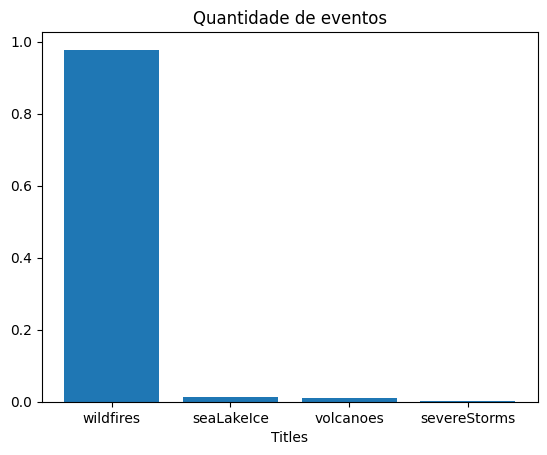

In [538]:
x = contagem_normalizada.index
y = contagem_normalizada

plt.xlabel("Titles")
plt.title("Quantidade de eventos")
plt.bar(x,y)
plt.show()

In [539]:
df_events['categoria_evento'] = titulos.apply(lambda x: x[0]) #separando a categoria de cada evento e adicionado na própria tabela de eventos

df_events.head(1)

,id,title,description,link,closed,categories,sources,geometry,categoria_evento
0,EONET_11744,Tropical Cyclone Dana,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt...",severeStorms


In [540]:
df_events['magnitude_evento'] = df_events['geometry'].apply(lambda x: [d['magnitudeValue'] for d in x]) #separando o vetor de magnitudes dos eventos e adicionando na própria tabela de eventos

df_events.head(1)

,id,title,description,link,closed,categories,sources,geometry,categoria_evento,magnitude_evento
0,EONET_11744,Tropical Cyclone Dana,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt...",severeStorms,"[35.0, 45.0, 55.0, 60.0, 65.0, 65.0, 65.0, 60.0]"


### Análise de Tempestades Severas

In [541]:
df_events_storms = df_events.query('categoria_evento == "severeStorms"') #selecioando as tempestades severas
 
df_events_storms['media_magnitude'] = df_events_storms['magnitude_evento'].apply(lambda x: np.mean(x)) #calculando a média de magnitude 

df_magnitude_grafico = df_events_storms[['title', 'media_magnitude']]

df_magnitude_grafico



,title,media_magnitude
0,Tropical Cyclone Dana,56.250000
1,Hurricane Kristy,85.200000
2,Tropical Storm Trami,44.615385
5,Tropical Storm Oscar,54.615385
6,Tropical Storm Nadine,33.333333


## Gráfico da itensidade das tempestades
Aqui podemos ver que a tempestade que consta nos dados da API com mair magnitude é a Hurricane Kristy, e a menor a Tropical Storm Nadine.	

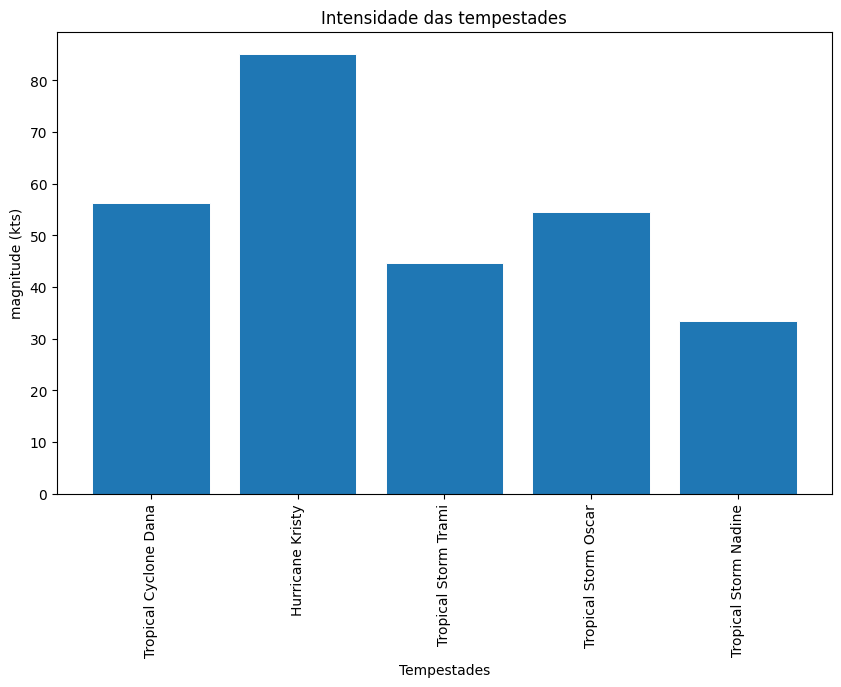

In [542]:
x = df_magnitude_grafico['title']
y = df_magnitude_grafico['media_magnitude']

plt.figure(figsize=(10, 6)) 
plt.bar(x, y, width=0.8, edgecolor="white", linewidth=0.7)

plt.xticks(rotation=90)

plt.xlabel('Tempestades')
plt.ylabel('magnitude (kts)')
plt.title('Intensidade das tempestades')

plt.show()




### Criação da tabela de incêndios florestais
Tabela sobre a relação mês e magnitude


In [543]:
df_events_wildfire = df_events.query('categoria_evento == "wildfires"')

df_wildfire_tempo = df_events_wildfire[['title','magnitude_evento']]

df_wildfire_tempo['magnitude_evento'] = df_wildfire_tempo['magnitude_evento'].apply(lambda x: x[0]) #retirar o valor da lista

df_wildfire_tempo['data'] = df_events_wildfire['geometry'].apply(lambda x: [d['date'] for d in x] ) #retirar o valor da data da lista presente em geometry
df_wildfire_tempo['data'] = df_wildfire_tempo['data'].apply(lambda x: x[0]) #retirar o valor da lista
df_wildfire_tempo['data'] = pd.to_datetime(df_wildfire_tempo['data'], errors='coerce') #transforma o valor em datetime
df_wildfire_tempo['data'] = df_wildfire_tempo['data'].dt.month #extrai apenas o mês da data




### Gráfico scatter que mostra a relação entre a magnitude do evento e o mês de inicio do evento
Analisando o gráfico é possível perceber que a grande quantiadade dos incêndios se concentra entre os meses de junho e setembro. Além disso esses mesmos meses também contam com uma alta concentração de outliers em relação ao restante dos meses, o que demonstra que os incendios mais intensos e preocupantes ocorreram nesse periodo. 

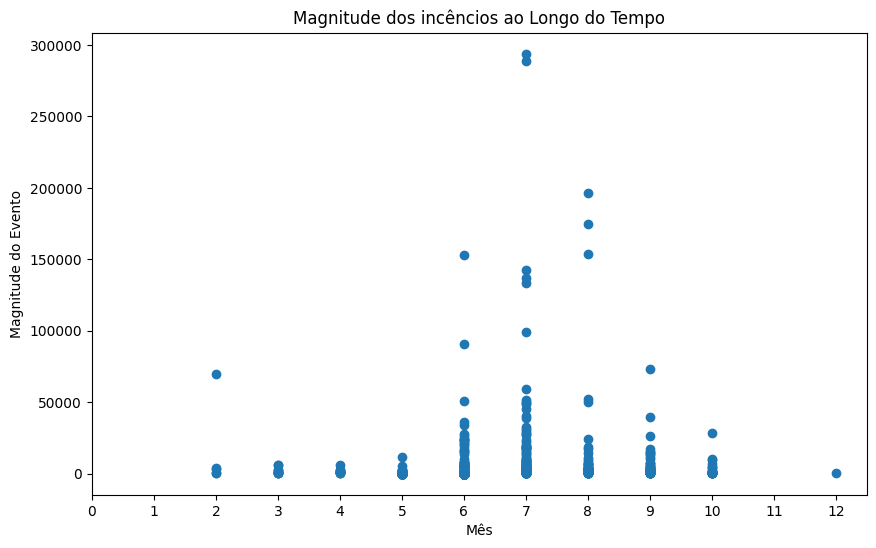

In [544]:
x = df_wildfire_tempo['data'] 
y = df_wildfire_tempo['magnitude_evento']

plt.figure(figsize=(10, 6)) 
plt.scatter(x, y)

plt.xlabel("Mês")
plt.ylabel("Magnitude do Evento")
plt.title("Magnitude dos incêncios ao Longo do Tempo")

plt.xticks(np.arange(0, 13, step=1))
plt.show()


In [545]:
quantidade_wildfires_mes = pd.DataFrame(df_wildfire_tempo["data"].value_counts()) #criando um dataframe a partir da contagem de de incendios por mês
quantidade_wildfires_mes


,count
data,
8,1126
7,930
9,682
6,558
10,189
5,86
4,12
3,11
2,5


## Gráfico que mostra a a relação mês x quantiade de incêndios
Observando os dados, é possível notar que a ocorrência de incêndios é mais concentrada nos meses de junho a setembro, com um pico em agosto, onde a quantidade ultrapassa 1000 registros. Esse padrão pode indicar uma relação sazonal, com aumento na quantidade de incêndios durante o período de verão ou seca, que geralmente favorece a propagação de incêndios.

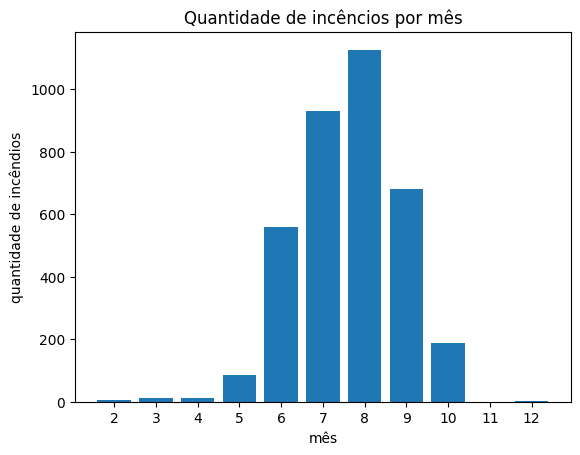

In [546]:
x = quantidade_wildfires_mes.index 
y = quantidade_wildfires_mes['count']

plt.xlabel("mês")
plt.ylabel("quantidade de incêndios")
plt.title("Quantidade de incêncios por mês")

plt.xticks(np.arange(0, 13, step=1))
plt.bar(x,y)

plt.show()




In [547]:
df_data = df_events['geometry'].apply(lambda x:[d['date'] for d in x]) #separando a data da coluna geometry

df_data_inicio_raw = df_data.apply(lambda x: x[0]) #armazena a primera data presente no dataframe
df_data_inicio = df_data_inicio_raw.apply(lambda x: pd.to_datetime(x)) #transforma todos os valores da coluna para datetime

df_data_final_raw = df_data.apply(lambda x: x[len(x)-1]) #armazena a ultima data presente no dataframe
df_data_final = df_data_final_raw.apply(lambda x: pd.to_datetime(x)) #transforma todos os valores da coluna para datetime

df_data_duracao = df_data_final - df_data_inicio #duracao dos eventos

# df_data_duracao

In [548]:
dias = df_data_duracao.dt.total_seconds() / 86400 #calcula a duração dos eventos em dias
# dias

In [549]:
df_events_correlation =  df_events[['categoria_evento','magnitude_evento']]
df_events_correlation['duracao_evento'] = dias

df_events_correlation['media_magnitude_evento'] = df_events_correlation['magnitude_evento'].apply(lambda x: np.mean(x) if x[0] is not None else None) #nào calcula a magnitude de listas que contenham None
df_events_correlation.head(4)

,categoria_evento,magnitude_evento,duracao_evento,media_magnitude_evento
0,severeStorms,"[35.0, 45.0, 55.0, 60.0, 65.0, 65.0, 65.0, 60.0]",1.75,56.250000
1,severeStorms,"[35.0, 35.0, 40.0, 45.0, 50.0, 60.0, 70.0, 80....",5.75,85.200000
2,severeStorms,"[35.0, 35.0, 35.0, 40.0, 45.0, 45.0, 45.0, 45....",6.25,44.615385
3,wildfires,[600.0],0.00,600.000000


In [550]:
df_events_correlation = df_events_correlation.drop(columns = 'magnitude_evento')

In [551]:
label_encoder = LabelEncoder() #cria uma codificação numérica para cada categoria única.
df_events_correlation['class_encoded'] = label_encoder.fit_transform(df_events_correlation['categoria_evento']) #substituindo cada valor da categoria por um número inteiro.

### Class encoded
*0*: Icebergs  
*1*: Tempestade Severa  
*2*: Vulcões  
*3*: Incêndios Florestais

In [552]:
df_events_correlation.head(4)

,categoria_evento,duracao_evento,media_magnitude_evento,class_encoded
0,severeStorms,1.75,56.250000,1
1,severeStorms,5.75,85.200000,1
2,severeStorms,6.25,44.615385,1
3,wildfires,0.00,600.000000,3


In [553]:
df_events.head(3)

,id,title,description,link,closed,categories,sources,geometry,categoria_evento,magnitude_evento
0,EONET_11744,Tropical Cyclone Dana,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt...",severeStorms,"[35.0, 45.0, 55.0, 60.0, 65.0, 65.0, 65.0, 60.0]"
1,EONET_11729,Hurricane Kristy,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt...",severeStorms,"[35.0, 35.0, 40.0, 45.0, 50.0, 60.0, 70.0, 80...."
2,EONET_11728,Tropical Storm Trami,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt...",severeStorms,"[35.0, 35.0, 35.0, 40.0, 45.0, 45.0, 45.0, 45...."


In [554]:
df_events_correlation = df_events_correlation.drop(columns = 'categoria_evento')

## Análise do Mapa de Correlação


1. **Correlação entre duracao_evento e class_encoded**:  
   Há uma correlação negativa moderada de **-0.55**, o que sugere que, conforme o valor de class_encoded aumenta, a duração do evento (duracao_evento) tende a diminuir. Essa relação indica que há um padrão de duração dos eventos que varia com as diferentes classes.

2. **Correlação entre media_magnitude_evento e class_encoded**:  
   A correlação é de **0.05**, praticamente nula, indicando que não há uma relação clara entre a média de magnitude dos eventos (media_magnitude_evento) e as classes (class_encoded). Isso sugere que a média de magnitude dos eventos não é influenciada pela classe dos eventos.

3. **Correlação entre duracao_evento e media_magnitude_event**:  
   A correlação é de **-0.03**, também próxima de zero, indicando que a duração dos eventos (duracao_evento) não tem uma relação significativa com a média de sua magnitude.



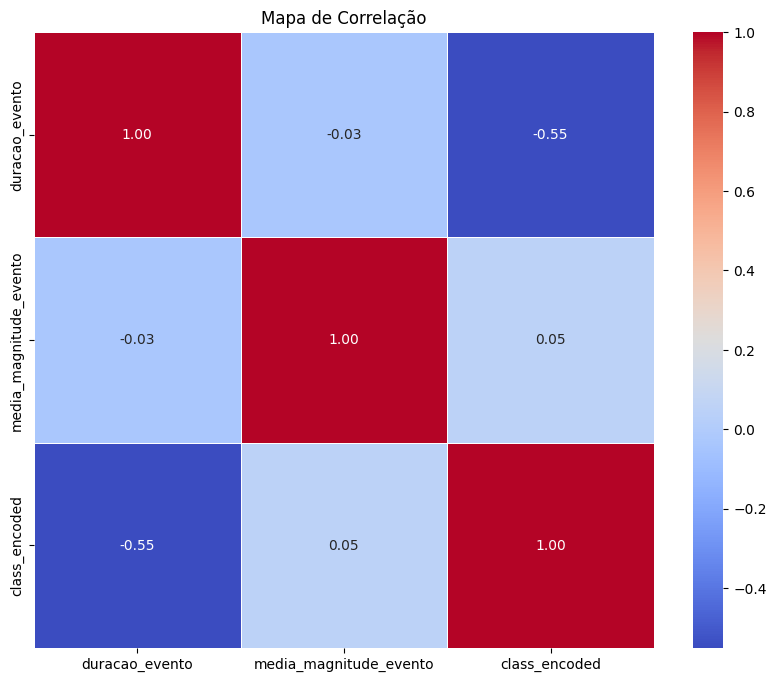

In [555]:
corr_matrix = df_events_correlation.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

# Considerações Finais do Projeto

Este projeto teve como objetivo explorar e analisar dados de eventos naturais, utilizando a API EONET da NASA para coletar informações detalhadas sobre eventos categorizados como incêndios florestais, vulcões, tempestades severas, entre outros. A partir da análise dos dados, foi possível entender melhor os padrões temporais e espaciais desses eventos, além de identificar correlações importantes entre diferentes variáveis.

## Principais Conclusões

1. **Distribuição dos Eventos**: A maioria dos eventos registrados são de incêndios florestais, indicando uma prevalência significativa desse tipo de evento nos dados. Em contraste, eventos de tempestades severas, vulcões e outros tipos de eventos naturais são menos frequentes, refletindo características específicas de cada fenômeno.

2. **Correlação entre Variáveis**: A análise de correlação revelou que a duração dos eventos e as classes possuem uma correlação baixa/moderada, indicando que eventos de certas categorias podem ter uma duração distinta. Por outro lado, a média da magnitude dos eventos não apresentou correlação significativa com outras variáveis, sugerindo que a intensidade dos eventos é mais independente da sua classificação ou duração.


## Principais Problemas

- **Escopo dos Dados**: O projeto se limitou aos dados disponibilizados pela API EONET, que podem não cobrir todos os eventos naturais globalmente ou fornecer dados completos sobre cada tipo de evento. A falta de dados sobre os eventos existentes como localização (País), e a falta de dados sobre eventos de outras categorias, como seca, terremotos, inundações e neve prejudica uma analise mais robusta dos dados
  
- **Análise Temporal**: Uma análise mais detalhada dos padrões sazonais e temporais poderia ser realizada para entender a variação dos eventos ao longo dos anos e em diferentes estações do ano, especialmente para eventos relacionados a condições climáticas e sazonais, como incêndios e tempestades. Porém tambem foi notado uma falta de dados de outros anos, a maior parte se concentra em 2024.

